In [1]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/AI_and_ML_Labs/Lab_1' # Please adjust the path accordingly
    os.chdir(path_to_file)
    !pwd

Mounted at /content/gdrive
/content/gdrive/My Drive/AI_and_ML_Labs/Lab_1


**Load Data**

In [2]:
import pandas as pd
dataset = pd.read_csv("housing_price.csv")
dataset

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-09,CHOA CHU KANG,4 ROOM,119,TECK WHYE LANE,04 TO 06,104.0,Model A,1989,400000.0
1,2012-06,BUKIT MERAH,3 ROOM,22,HAVELOCK RD,04 TO 06,64.0,Standard,1969,404000.0
2,2016-05,JURONG WEST,EXECUTIVE,906,JURONG WEST ST 91,07 TO 09,141.0,Apartment,1989,422000.0
3,2013-10,JURONG WEST,3 ROOM,510,JURONG WEST ST 52,13 TO 15,74.0,Model A,1984,375000.0
4,2015-04,JURONG EAST,4 ROOM,232,JURONG EAST ST 21,07 TO 09,95.0,New Generation,1982,385000.0
...,...,...,...,...,...,...,...,...,...,...
1995,2012-06,TOA PAYOH,3 ROOM,20,LOR 7 TOA PAYOH,07 TO 09,67.0,Improved,1970,353000.0
1996,2012-06,YISHUN,4 ROOM,156,YISHUN ST 11,01 TO 03,93.0,New Generation,1985,400000.0
1997,2015-08,TAMPINES,4 ROOM,155,SIMEI RD,01 TO 03,104.0,Model A,1989,428000.0
1998,2017-02,JURONG WEST,4 ROOM,645,JURONG WEST ST 61,07 TO 09,100.0,Model A,1998,416000.0


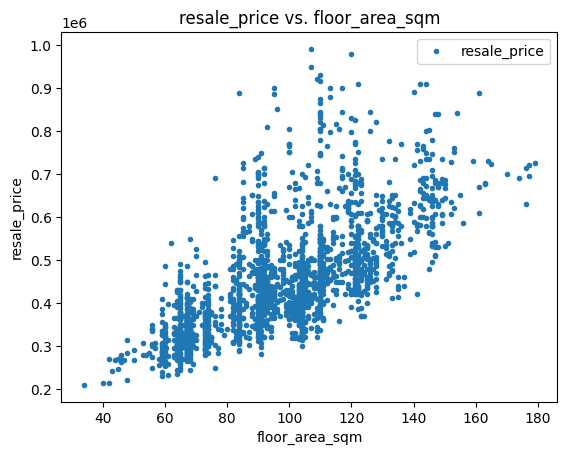

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

dataset.plot(x='floor_area_sqm', y='resale_price', style='.')
plt.title('resale_price vs. floor_area_sqm')
plt.ylabel('resale_price')
plt.xlabel('floor_area_sqm')
plt.show()

In [4]:
X = dataset[['floor_area_sqm']]
y = dataset['resale_price']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Build and Train the Model**

In [6]:
from sklearn.linear_model import LinearRegression
#Build the Model
regressor = LinearRegression()
#Train the Model
regressor.fit(X_train, y_train)

LinearRegression()

In [7]:
print(regressor.intercept_)
print(regressor.coef_)

99200.12048549199
[3633.15226223]


**Evaluate the Model**

In [8]:
from sklearn import metrics
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R Squared Value:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 70357.60138898242
R Squared Value: 0.4040821178908327


**Apply the Model**

In [9]:
y_pred = regressor.predict(X_test)

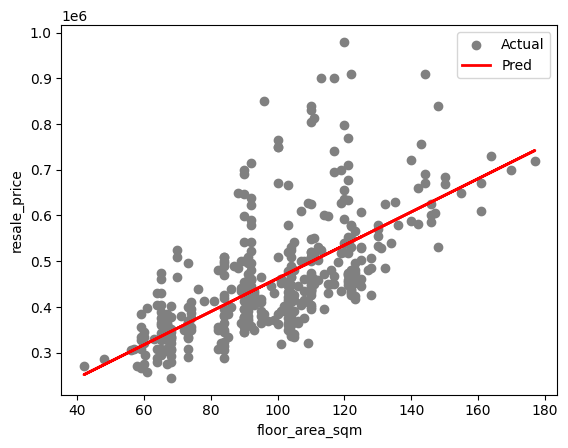

In [10]:
plt.scatter(X_test, y_test,  color='gray', label ='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label ='Pred')
plt.xlabel('floor_area_sqm')
plt.ylabel('resale_price')
plt.legend()
plt.show()